In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


C:\Users\82109\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset=pd.read_csv("Dry_Bean_Dataset.csv")
dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
dataset.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

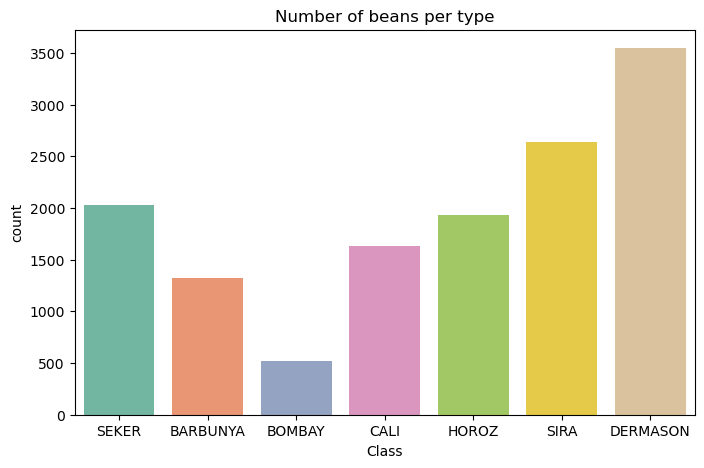

In [5]:
plt.figure(figsize = (8, 5))
sns.countplot(x =dataset["Class"], palette="Set2")
plt.title("Number of beans per type")
plt.show()

In [6]:
dataset['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [13]:
X = dataset.iloc[:,0:16].values
y = dataset['Class']

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [14]:
scaler_X = preprocessing.StandardScaler().fit(X_train)
X_train= scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

In [15]:
print("X_train.shape:", X_train.shape)

print("y_train.shape:", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_test.shape)

X_train.shape: (10888, 16)
y_train.shape: (10888, 7)
X_test.shape: (2723, 16)
y_test.shape: (2723, 7)


In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.optimizers import SGD, Adam

In [19]:
def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(64, activation='ReLU', input_shape=(16,)))
    model.add(layers.Dense(32, activation='ReLU'))
    model.add(layers.Dense(16, activation='ReLU'))
    model.add(layers.Dense(7, activation='softmax'))
    model.compile(Adam(lr=0.00048), 'categorical_crossentropy', metrics=['accuracy'])
    
    return model


model = build_model() 

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                1088      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 7)                 119       
                                                                 
Total params: 3,815
Trainable params: 3,815
Non-trainable params: 0
_________________________________________________________________


In [20]:
#fitting the model and predicting 
# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
341/341 [==============================] - 2s 3ms/step - loss: 0.7913 - accuracy: 0.7743 - val_loss: 0.3499 - val_accuracy: 0.8935
Epoch 2/100
341/341 [==============================] - 1s 3ms/step - loss: 0.2843 - accuracy: 0.9052 - val_loss: 0.2326 - val_accuracy: 0.9203
Epoch 3/100
341/341 [==============================] - 1s 3ms/step - loss: 0.2266 - accuracy: 0.9190 - val_loss: 0.2135 - val_accuracy: 0.9258
Epoch 4/100
341/341 [==============================] - 1s 3ms/step - loss: 0.2090 - accuracy: 0.9236 - val_loss: 0.2056 - val_accuracy: 0.9302
Epoch 5/100
341/341 [==============================] - 1s 3ms/step - loss: 0.2030 - accuracy: 0.9232 - val_loss: 0.2002 - val_accuracy: 0.9291
Epoch 6/100
341/341 [==============================] - 1s 3ms/step - loss: 0.1983 - accuracy: 0.9256 - val_loss: 0.1965 - val_accuracy: 0.9302
Epoch 7/100
341/341 [==============================] - 1s 3ms/step - loss: 0.1952 - accuracy: 0.9262 - val_loss: 0.1966 - val_accuracy: 0.9335

Epoch 58/100
341/341 [==============================] - 1s 3ms/step - loss: 0.1650 - accuracy: 0.9374 - val_loss: 0.1878 - val_accuracy: 0.9354
Epoch 59/100
341/341 [==============================] - 1s 3ms/step - loss: 0.1629 - accuracy: 0.9380 - val_loss: 0.1944 - val_accuracy: 0.9379
Epoch 60/100
341/341 [==============================] - 1s 3ms/step - loss: 0.1648 - accuracy: 0.9353 - val_loss: 0.1916 - val_accuracy: 0.9357
Epoch 61/100
341/341 [==============================] - 1s 3ms/step - loss: 0.1633 - accuracy: 0.9375 - val_loss: 0.1893 - val_accuracy: 0.9379
Epoch 62/100
341/341 [==============================] - 1s 3ms/step - loss: 0.1634 - accuracy: 0.9375 - val_loss: 0.1962 - val_accuracy: 0.9339
Epoch 63/100
341/341 [==============================] - 1s 3ms/step - loss: 0.1627 - accuracy: 0.9369 - val_loss: 0.1923 - val_accuracy: 0.9328
Epoch 64/100
341/341 [==============================] - 1s 3ms/step - loss: 0.1635 - accuracy: 0.9367 - val_loss: 0.1903 - val_accuracy:

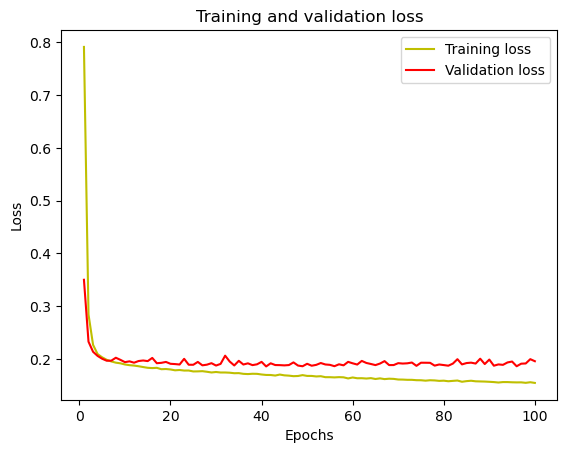

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

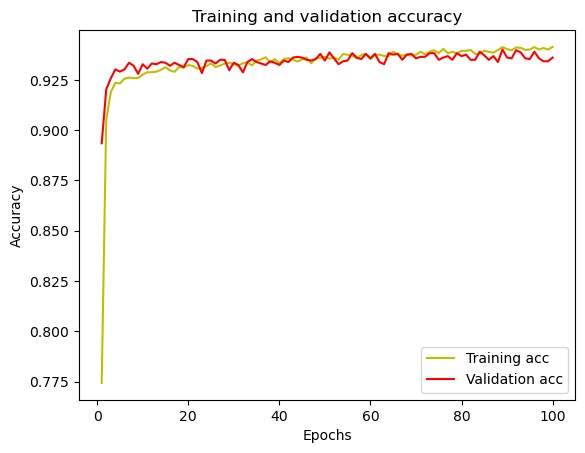

In [22]:
acc = model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       255
           1       1.00      0.99      0.99        92
           2       0.92      0.97      0.95       350
           3       0.91      0.95      0.93       735
           4       0.96      0.96      0.96       390
           5       0.97      0.97      0.97       376
           6       0.90      0.87      0.88       525

    accuracy                           0.94      2723
   macro avg       0.95      0.94      0.95      2723
weighted avg       0.94      0.94      0.94      2723

[[227   0  20   0   1   2   5]
 [  0  91   1   0   0   0   0]
 [  2   0 339   0   6   1   2]
 [  0   0   0 699   1   7  28]
 [  0   0   6   2 374   0   8]
 [  0   0   0   3   0 364   9]
 [  0   0   1  60   8   1 455]]
